# Learning Agency Lab Hiring Exercise
## Dominic Scarlett

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [2]:
data=pd.read_csv('Job Search/archive/Private_data.csv')
data.head()

,Unnamed: 0,NAME OF THE STUDENT,UNIVERSITY,PROGRAM NAME,Specialisation,SEMESTER,Domain,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50),TOTAL SCORE (OUT of 100),RANK,PERCENTILE
0,0,Camila Wood,"Stanford University, USA",B.Com,Honours,5th,Finance,50,50,100,1,1.000000
1,1,Alexander Thompson,"Stanford University, USA",B.Com,Financial Services,5th,Finance,50,50,100,2,0.993377
2,2,Liam Taylor,"Harvard University, USA",B.Com,Accounting Analytics,5th,BA,50,50,100,3,0.986755
3,3,Evelyn Jenkins,"Stanford University, USA",B.Com,Honours,5th,Finance,49,50,99,4,0.980132
4,4,Michael Jackson,"Harvard University, USA",MBA,International Business,3rd,IB,50,49,99,5,0.973510


# Data Exploration

We can start by examining some descriptive stats of the numeric variables to get a sense for their distributions and see if there's anything worth further investigation. Specifically, the scores are likely to be an outcome of interest, while the rank and percentiles are ordinal variables based on the scores and therefore statistics of them are not enlightening. Further, as mentioned in Part 1, it's not clear whether the fact that every student has a unique percentile and rank regardless of score is not erroneous, so for purposes of this analysis, they will not be treated as outcomes of interest.

In [3]:
data.describe()

,Unnamed: 0,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50),TOTAL SCORE (OUT of 100),RANK,PERCENTILE
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,75.000000,37.993377,33.635762,71.629139,76.000000,0.503311
std,43.734045,10.734056,11.866751,21.200823,43.734045,0.289629
min,0.000000,4.000000,1.000000,5.000000,1.000000,0.006623
25%,37.500000,32.500000,27.000000,62.000000,38.500000,0.254967
50%,75.000000,40.000000,36.000000,74.000000,76.000000,0.503311
75%,112.500000,47.000000,43.000000,89.000000,113.500000,0.751656
max,150.000000,50.000000,50.000000,100.000000,151.000000,1.000000


On average, the students performed better on the general management (GM) portion of the exam than the Domain Specific (DS) portion by a little over 4 points. The standard deviations of the portion scores are comparable, though the GM's SD is smaller likely because its mean is closer to the maximum possible value. On both portions, the median score is a few points higher than the mean score, suggesting that the distributions are skewed towards high scores.

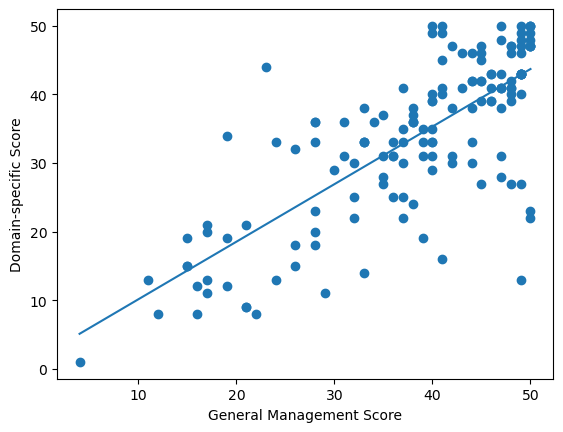

In [4]:
x=data['GENERAL MANAGEMENT SCORE (OUT of 50)']
y=data['Domain Specific SCORE (OUT 50)']

a, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, a*x+b)
plt.xlabel("General Management Score")
plt.ylabel("Domain-specific Score")
plt.show()

Unsurprisingly, the scores for each portion of the exam are positively related.

Text(0.5, 1.0, 'Domain-specific')

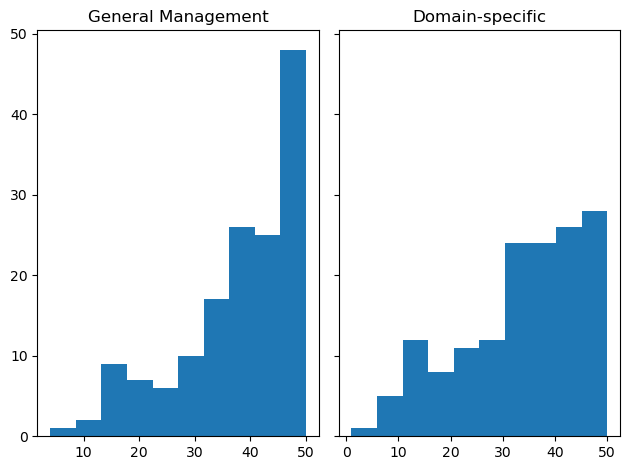

In [5]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(data.iloc[:,7], bins=10)
axs[0].set_title('General Management')
axs[1].hist(data.iloc[:,8], bins=10)
axs[1].set_title('Domain-specific')

Histograms make clear the only obvious difference between the portion scores, which is that very high scores were more common on the GM portion. While this finding may be interesting in and of itself, depending on the potential explanations, it was not especially difficult to ascertain and therefore is probably not surprising to those with knowledge of the examination. We're more likely to discover something insightful by exploring the relationships between the heretofore unexamined categorical variables and the scores. Let's start by examining the categorical variables.

In [6]:
pd.value_counts(data['UNIVERSITY'])

UNIVERSITY
Harvard University, USA                              75
Stanford University, USA                             50
University of Oxford, UK                             12
Massachusetts Institute of Technology (MIT), USA      9
University of Cambridge, UK                           2
California Institute of Technology (Caltech), USA     2
Imperial College London, UK                           1
Name: count, dtype: int64

In [7]:
pd.value_counts(data['PROGRAM NAME'])

PROGRAM NAME
MBA              57
BBA              44
B.Com            37
Intg. BBA+MBA    13
Name: count, dtype: int64

In [8]:
pd.value_counts(data['Specialisation'])

Specialisation
International Business                                 51
Financial Services                                     23
Innovation Entrepreneurship and Venture Development    18
Business Analytics                                     12
Information Technology with Accounting Analytics       12
Digital Marketing                                      11
Honours                                                 8
Finance                                                 4
Financial Services with Digital Finance                 3
Entrepreneurship & Innovation                           3
Brand Management                                        3
Accounting Analytics                                    1
Accounting                                              1
Banking and Financial Services                          1
Name: count, dtype: int64

In [9]:
pd.value_counts(data['SEMESTER'])

SEMESTER
5th    80
3rd    59
9th    12
Name: count, dtype: int64

In [10]:
pd.value_counts(data['Domain'])

Domain
IB         47
Finance    41
E&I        22
BA         21
DM         13
Generic     7
Name: count, dtype: int64

# Data Cleaning & Investigating Superficial Relationships

As mentioned in Part 1, some of the categories have so few observations that they are not useful for drawing inferences due to the likelihood of sampling error. It is possible that some of the categories have enough in common with another that there may be a theoretical reason to believe that phenomena for them will be equivalent to those of the other. For example, perhaps it would be most appropriate to combine the observations of "Entrepreneurship & Innovation" with those of "Innovation Entrepreneurship and Venture Development" because they are functionally equivalent programs with different names. The advantage of this would be that the three observations in the former category could be combined with a larger category and therefore used to make inferences. However, without more theoretical knowledge of the programs in question, this is too presumptuous. Therefore, for the sake of expedience, we can combine categories with low numbers of observations into "Other" categories that will not be used to draw inferences. Choosing what counts as a "low number" of observations is somewhat arbitrary, but in this case we will use categories that account for less than 10% of the data (i.e. <16 observations).

In [11]:
#Create a new variable with replaced values so as not to throw away data that we may want to use later.
data['Uni']=data['UNIVERSITY'].str.replace('University of Oxford, UK','Other').replace('Massachusetts Institute of Technology (MIT), USA','Other').replace('University of Cambridge, UK','Other').replace('California Institute of Technology (Caltech), USA','Other').replace('Imperial College London, UK','Other')

In [12]:
pd.value_counts(data['Uni']) #Check that it worked as intended.

Uni
Harvard University, USA     75
Stanford University, USA    50
Other                       26
Name: count, dtype: int64

In the case of the Program Name and Semester variables, there is only one category that counts as too small, so it cannot be combined into an "Other category." In the case of the Domain variable, there are two small categories, but because they do not clearly share anything in common, the information lost by combining them doesn't justify the minor gain in parsimony.

Now we can start examining differences in outcomes between categories. Given my background in academic research, it is unusal for me to look for patterns in data without a theoretical basis or working hypothesis about what I expect to find. However, because of my lack of knowledge of the data generating process, I cannot derive these on my own. As a result, I will refrain from inferring that any patterns observed are meaningful or causal, though they may be interesting enough to warrant further examination in future research.

## Exam scores of "Big 2" students vs. those of other universities

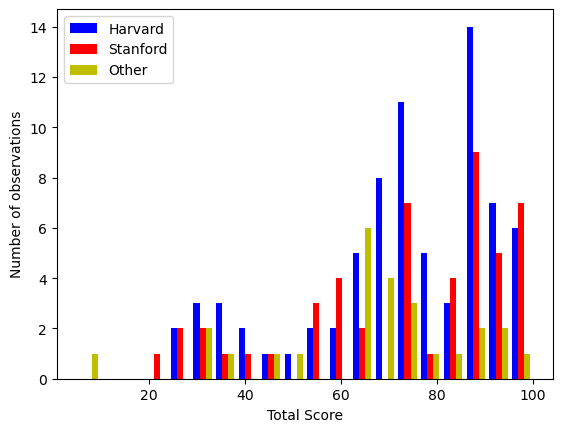

In [13]:
x1 = data.loc[data.Uni=='Harvard University, USA', 'TOTAL SCORE (OUT of 100)']
x2 = data.loc[data.Uni=='Stanford University, USA', 'TOTAL SCORE (OUT of 100)']
x3 = data.loc[data.Uni=='Other', 'TOTAL SCORE (OUT of 100)']

plt.hist([x1,x2,x3], color=['b','r','y'], label=['Harvard','Stanford','Other'],bins=20)
plt.xlabel("Total Score")
plt.ylabel("Number of observations")
plt.legend()

From the figure above, we can see that students from the "Big 2" of Harvard and Stanford tended  to perform better than those from all other institutions. However, precise differences in categories are obscured somewhat in the histogram by the difference in observations between them. Therefore, it is also useful to compare statistics rather than raw distributions.

In [14]:
score_by_uni=data.groupby("Uni")["TOTAL SCORE (OUT of 100)"]

In [15]:
score_by_uni.describe()

,count,mean,std,min,25%,50%,75%,max
Uni,,,,,,,,
"Harvard University, USA",75.0,72.773333,19.803476,24.0,64.00,75.0,88.50,100.0
Other,26.0,65.346154,22.314018,5.0,62.00,68.0,77.25,96.0
"Stanford University, USA",50.0,73.180000,22.455116,20.0,58.25,81.0,90.00,100.0


The mean score of Harvard and Stanford students are nearly equal, although Stanford's median score is higher, suggesting its mean is dragged down more by low outliers. Because the means and medians of the Big 2 are so close, there is not likely a significant difference between them. However, there may be a significant difference between the Big 2's and all other universities' scores. This could make some theoretical sense if we assume that the Big 2 have more students in the data because they have larger, more prestigious programs than other universities and therefore their students should be expected to score higher.

In [16]:
B2_scores=data.loc[data['Uni'].isin(['Harvard University, USA','Stanford University, USA'])]
B2_scores=B2_scores['TOTAL SCORE (OUT of 100)']

In [17]:
Other_uni_scores=data.loc[data['Uni']=='Other']
Other_uni_scores=Other_uni_scores['TOTAL SCORE (OUT of 100)']

It's visible from the histogram above that neither group is normally distributed and the number of observations in the "other" group is small, so it's most appropriate to use a non-parametric test to determine if there is a significant difference in scores between the groups. Due to the circumstances of the exercise, we won't be drawing any conclusions based on this test, so the loss of statistical power due to the use of a non-parametric test is inconsequential. We can use a Mann-Whitney U test to compare the differences in medians between the scores of students from the Big 2 and all other universities.

In [18]:
stats.mannwhitneyu(x=B2_scores, y=Other_uni_scores, alternative='two-sided', method='exact')

MannwhitneyuResult(statistic=1991.0, pvalue=0.07149600831829096)

The test returns a p-value of about 0.07, which is just above the conventional cut-off of 0.05 to be considered significant. Therefore, we can't be confident that the difference between the groups observed in the data is reflective of the larger population of students taking the exam at these institutions.

## Test scores of students in MBA-terminal programs vs. those in bachelor's-terminal programs
We can perform a similar test to compare the scores of MBA students with those in bachelor's programs. Given that a master's is a more advanced degree with more rigorous requirements for admission and graduation than a bachelor's, it is reasonable to expect that MBA students would perform better on the test. For our purposes here, we will classify an integrated program as being an MBA program, given that that is the terminal degree administered.

In [19]:
MBA_scores=data.loc[data['PROGRAM NAME'].isin(['Intg. BBA+MBA','MBA'])]
MBA_scores=MBA_scores['TOTAL SCORE (OUT of 100)']

In [20]:
Bach_scores=data.loc[data['PROGRAM NAME'].isin(['BBA','B.Com'])]
Bach_scores=Bach_scores['TOTAL SCORE (OUT of 100)']

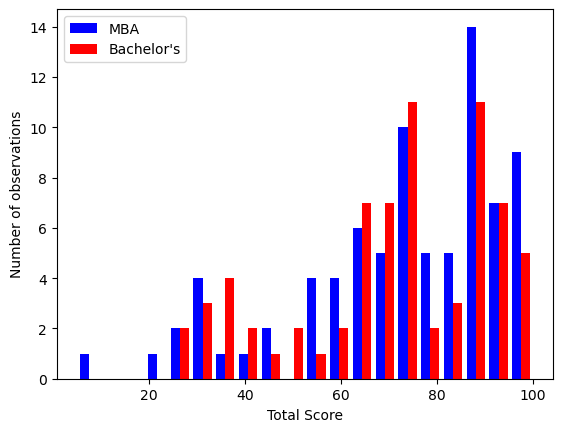

In [46]:
plt.hist([Bach_scores,MBA_scores], color=['b','r'], label=['MBA',"Bachelor's"],bins=20)
plt.xlabel("Total Score")
plt.ylabel("Number of observations")
plt.legend()

No clear difference between scores for each degree is evident from the histogram.

MBA_scores.describe()

In [22]:
Bach_scores.describe()

count     81.000000
mean      72.530864
std       21.763551
min        5.000000
25%       62.000000
50%       76.000000
75%       90.000000
max      100.000000
Name: TOTAL SCORE (OUT of 100), dtype: float64

The mean and median score of each degree group are comparable, so a statistical test is not likely to find a difference. However, we can follow through out of due diligence. Again, we'll use Mann-Whitney because the distributions are too skewed to be normal.

In [23]:
stats.mannwhitneyu(x=MBA_scores, y=Bach_scores, alternative='two-sided')
#We don't need to use the "method=exact" argument because there is a large enough number of observations in each group.
#This is more computationally efficient.

MannwhitneyuResult(statistic=2627.5, pvalue=0.43969087712581)

As expected, the p-value is not even close to suggesting significance even though we have about evenly-size groups that are large by the standards of this data-set.

# Other Interesting Questions/Data Enhancement

We could continue to test for simple difference in scores between categories in other variables, but we would likely again be limited in our findings due to small sample sizes limiting the statistical power of tests. Therefore, it's more a more interesting exercise to make some assumptions about how the real-world data generating process works in order to probe beneath the surface and ask some more questions that may have interesting answers regardless of a lack of statistical power.

## Performance of students whose exam domain does not match their specializations relative to their matched peers'
For example, there are six domains for the exam, presumably specifying the subject area of the "domain-specific" portion of the exam, while the "general management" portion is the same for all students. Most students' "specialisation" is in an area similar to the domain of their exam. For example, we expect students specializing in international business to take the IB domain-specific version of the exam. However, there are some students who specialized in an area that does not clearly correspond to their exam domain or whose specialization does not have a clearly-corresponding domain. Do these students perform poorer on the domain-specific portion of the exam due to a lack of preparation from their specializations? We might expect to find this.

In [24]:
#Select all students whose specialization clearly matches their domain
IB=data.loc[(data['Domain']=='IB')&(data['Specialisation']=='International Business')]

In [25]:
Finance=data.loc[(data['Domain']=='Finance')&(data['Specialisation'].isin(['Finance','Financial Services','Financial Services with Digital Finance','Banking and Financial Services']))]

In [26]:
EI=data.loc[(data['Domain']=='E&I')&(data['Specialisation'].isin(['Innovation Entrepreneurship and Venture Development','Entrepreneurship & Innovation']))]

In [27]:
BA=data.loc[(data['Domain']=='BA')&(data['Specialisation'].isin(['Business Analytics','Accounting Analytics','Information Technology with Accounting Analytics']))]

In [28]:
DM=data.loc[(data['Domain']=='DM')&(data['Specialisation']=='Digital Marketing')]

To start with, we can assume that students whose specialization does not clearly correspond to a specific domain are expected to take the "generic" version of the domain-specific portion.

In [29]:
Generic=data.loc[(data['Domain']=='Generic')&(data['Specialisation'].isin(['Accounting','Honours','Brand Management']))]

In [30]:
Matches=[IB,Finance,EI,BA,DM,Generic]
Matches=pd.concat(Matches)

In [31]:
non_matches=data[~data.index.isin(Matches.index)]

In [32]:
non_matches

,Unnamed: 0,NAME OF THE STUDENT,UNIVERSITY,PROGRAM NAME,Specialisation,SEMESTER,Domain,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50),TOTAL SCORE (OUT of 100),RANK,PERCENTILE,Uni
0,0,Camila Wood,"Stanford University, USA",B.Com,Honours,5th,Finance,50,50,100,1,1.000000,"Stanford University, USA"
3,3,Evelyn Jenkins,"Stanford University, USA",B.Com,Honours,5th,Finance,49,50,99,4,0.980132,"Stanford University, USA"
5,5,Chloe Moore,"Stanford University, USA",B.Com,Honours,5th,Finance,50,48,98,6,0.966887,"Stanford University, USA"
8,8,Aiden Rivera,"Stanford University, USA",B.Com,Honours,5th,Finance,50,47,97,9,0.947020,"Stanford University, USA"
26,26,Henry Perez,"Stanford University, USA",B.Com,Honours,5th,Finance,41,50,91,27,0.827815,"Stanford University, USA"
28,28,Gabriel Miller,"Stanford University, USA",B.Com,Honours,5th,Finance,44,46,90,29,0.814570,"Stanford University, USA"
34,34,James Harris,"Stanford University, USA",B.Com,Accounting,5th,Finance,42,47,89,35,0.774834,"Stanford University, USA"
45,45,David Rodriguez,"Harvard University, USA",MBA,Business Analytics,3rd,E&I,47,41,88,46,0.701987,"Harvard University, USA"
46,46,Aria Nelson,"Stanford University, USA",B.Com,Honours,5th,Finance,45,42,87,47,0.695364,"Stanford University, USA"
73,73,Logan Turner,"Stanford University, USA",B.Com,Finance,5th,Generic,47,28,75,74,0.516556,"Stanford University, USA"


In [33]:
Matches=Matches['Domain Specific SCORE (OUT 50)']

In [34]:
Matches.count()

128

In [35]:
non_matches=non_matches['Domain Specific SCORE (OUT 50)']
non_matches.count()

23

23 students took the domain-specific portion of the exam in a subject area that does not obviously correspond to their specialization. Let's see how these students' domain-specific scores compared to those whose specializations matched their domains.

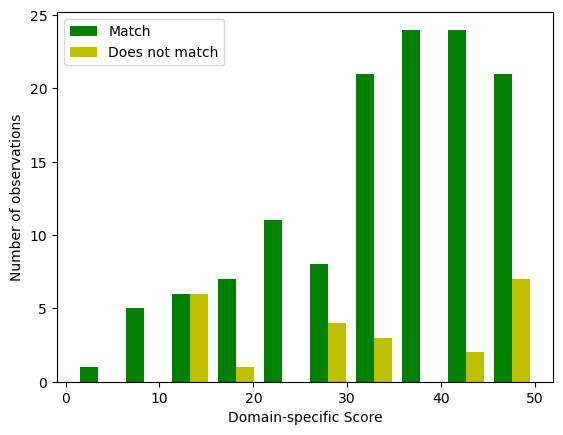

In [36]:
plt.hist([Matches, non_matches], color=['g','y'], label=['Match','Does not match'],bins=10)
plt.xlabel("Domain-specific Score")
plt.ylabel("Number of observations")
plt.legend()

The small number of observations of non-matches makes it difficult to visually observe a describable difference, although it does appear that non-matches perhaps tended to perform slightly worse.

In [48]:
print(Matches.describe(),
non_matches.describe())

count    128.00000
mean      33.96875
std       11.46507
min        1.00000
25%       27.00000
50%       36.00000
75%       43.00000
max       50.00000
Name: Domain Specific SCORE (OUT 50), dtype: float64 count    23.000000
mean     31.782609
std      14.038766
min      11.000000
25%      17.000000
50%      31.000000
75%      46.500000
max      50.000000
Name: Domain Specific SCORE (OUT 50), dtype: float64


The means of the groups are comparable, but the medians are slightly more differentiated. We can perform another non-parametric (as they are clearly not normally-distributed) test to see if the medians of the categories are significantly different.

In [39]:
stats.mannwhitneyu(x=Matches, y=non_matches, alternative='two-sided')

MannwhitneyuResult(statistic=1581.5, pvalue=0.5721254563895781)

Again, we fail to find a statistically significant difference.

## Exam scores for UK vs. USA students

Lastly, it may be interesting to try to tease out some new-- potentially theoretically-meaningful-- information not contained within the variables provided. Educational institutions differ with respect to their unique characteristics, but also with respect to their contexts, including their country of location. Differences in culture, educational policy, etc. between countries may be expected to have tangible effects on educational outcomes. Therefore, we can create a new variable for the country in which the institution is located in order to compare student outcomes. 

In [40]:
data['country']=data['UNIVERSITY'].str.replace('University of Oxford, UK','UK').replace('Massachusetts Institute of Technology (MIT), USA','USA').replace('University of Cambridge, UK','UK').replace('California Institute of Technology (Caltech), USA','USA').replace('Imperial College London, UK','UK').replace('Stanford University, USA','USA').replace('Harvard University, USA','USA')

In [41]:
data['country'].value_counts()

country
USA    136
UK      15
Name: count, dtype: int64

Only 15 students from UK institutions are in the dataset. This is only an exercise in investigation as the sample size is too small to draw conclusions, but we can still examine any differences between the groups.

In [42]:
USA=data.loc[data['country']=='USA']
USA=USA['TOTAL SCORE (OUT of 100)']

In [43]:
UK=data.loc[data['country']=='UK']
UK=UK['TOTAL SCORE (OUT of 100)']

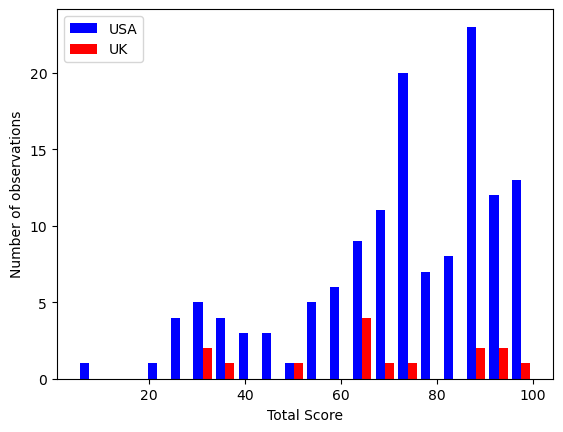

In [44]:
plt.hist([USA,UK], color=['b','r'], label=['USA','UK'],bins=20)
plt.xlabel("Total Score")
plt.ylabel("Number of observations")
plt.legend()

There are too few UK scores to visually observe a pattern and make a comparison with the USA scores, but we can use statistics.

In [49]:
print(USA.describe(), UK.describe())

count    136.000000
mean      72.161765
std       20.966718
min        5.000000
25%       62.000000
50%       75.000000
75%       89.000000
max      100.000000
Name: TOTAL SCORE (OUT of 100), dtype: float64 count    15.000000
mean     66.800000
std      23.431359
min      30.000000
25%      55.000000
50%      66.000000
75%      89.500000
max      96.000000
Name: TOTAL SCORE (OUT of 100), dtype: float64


The mean and median scores are notably lower for UK schools than USA ones at face value, but let's see if that stands up to a test.

In [45]:
stats.mannwhitneyu(x=USA, y=UK, alternative='two-sided')

MannwhitneyuResult(statistic=1162.5, pvalue=0.37684816750920613)

The test does not suggest there's a meaningful difference between scores by country, but again this could be due to small sample size limiting the power. However, even in potential future investigations into differences in scores by country with a larger number of observations of similar data, any significant differences between countries could be confounded by differences between universities that are independent of their countries. For example, we found a nearly statistically significant difference in scores between the Big 2 universities and all others in the data such that students at the Big 2 tended to score higher than those who were not. Notably, though, both of the Big 2 are located in the US, while all of the UK schools were classified as "Other". Thus, if, for example, it is found that students in the USA perform significantly better than students in the UK, it is not necessarily due to differences between the countries but could instead be an artifact of the general superiority of educational outcomes for students who attend the Big 2. More observations of scores from students who attend other institutions outside of the Big 2 in both the US and the UK would be necessary to tease out the underlying cause of the effect.